<a href="https://colab.research.google.com/github/Suryapilla73372/MachineLearning/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [6]:
data = pd.read_csv("/content/AirPassengers.csv")
     

In [7]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data.shape

(144, 2)

In [9]:
data.tail(3)

,Month,#Passengers
141,1960-10,461
142,1960-11,390
143,1960-12,433


In [10]:
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
indexedData = data.set_index(['Month'])

In [11]:
indexedData.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


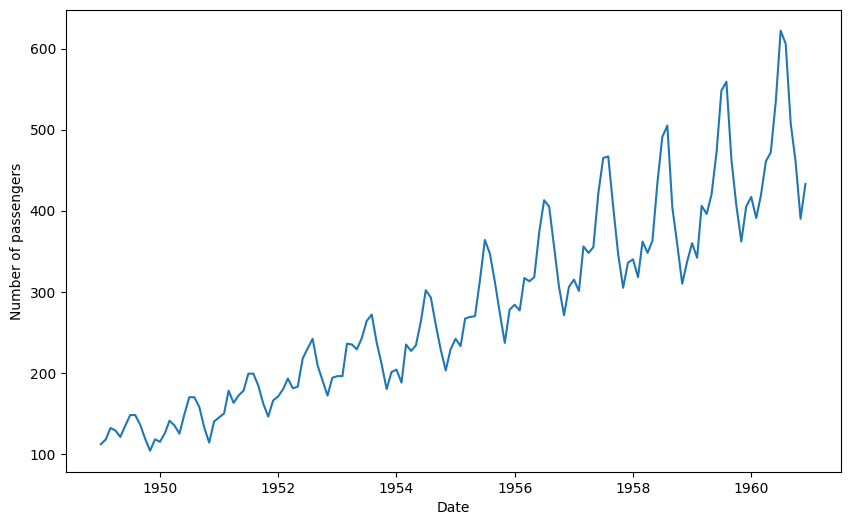

In [12]:
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.plot(indexedData)

In [13]:
rolmean = indexedData.rolling(window=12).mean()
rolstd = indexedData.rolling(window=12).std()
print(rolmean, rolstd)
     

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.250000

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.685994

[144 rows x 1 columns]


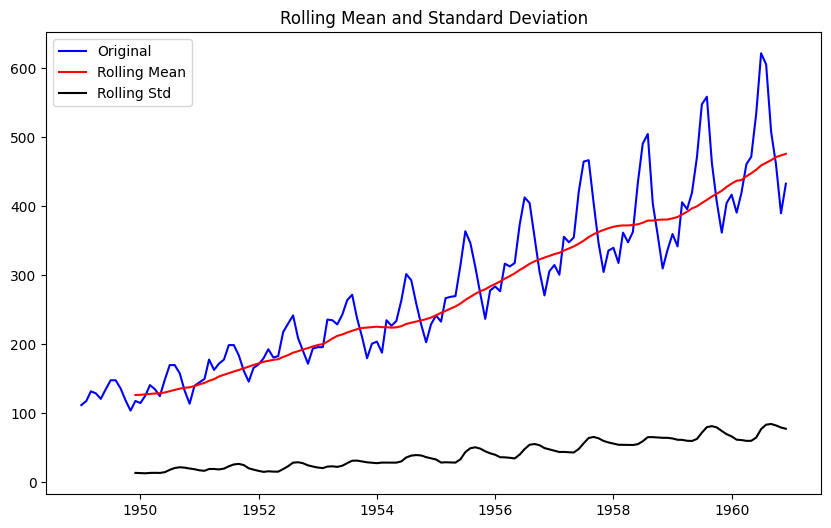

In [14]:
orig = plt.plot(indexedData, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [15]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(indexedData['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
     

ADF Statistic: 0.8273719403667971
p-value: 0.9920653980124213
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


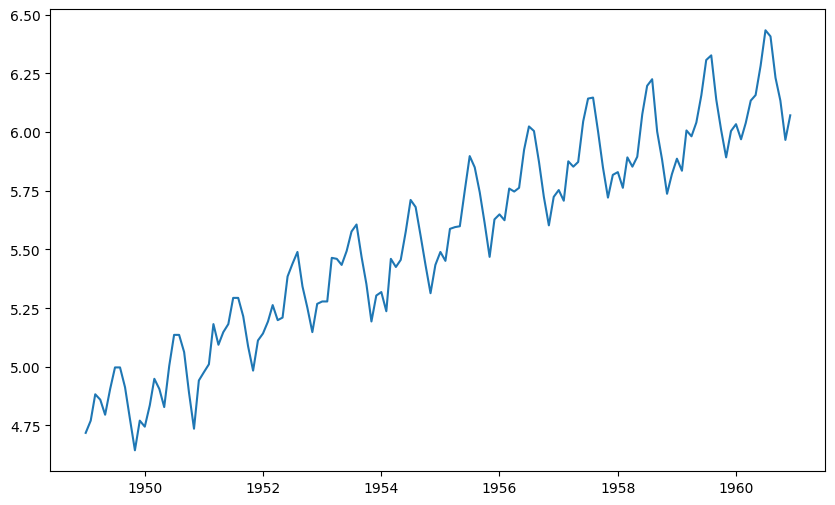

In [16]:

df_log = np.log(indexedData)
plt.plot(df_log)

In [17]:

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['#Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

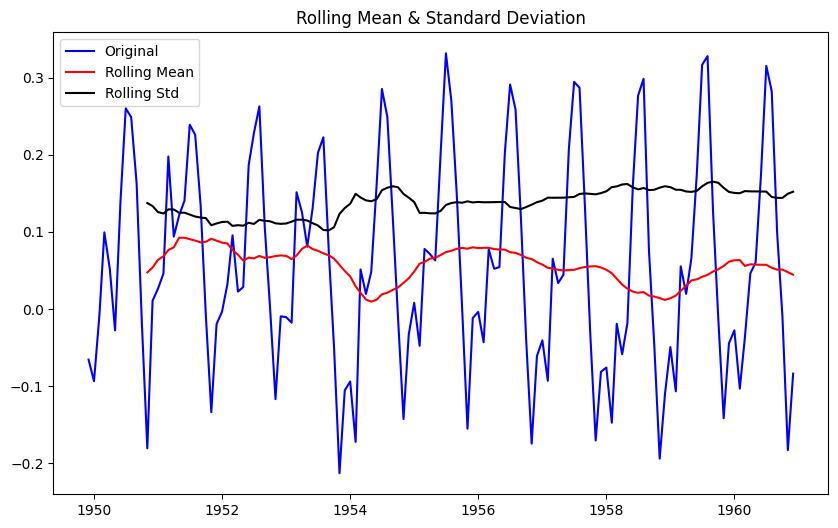

ADF Statistic: -3.166112334975948
p-value: 0.02203195175734353
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [18]:

rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


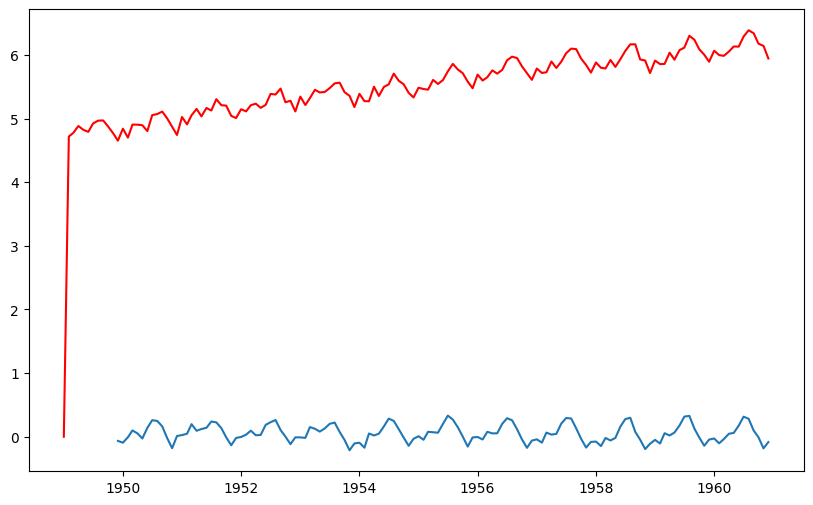

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as smapi

decomposition = seasonal_decompose(df_log) 
model = smapi.tsa.arima.ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.plot(df_log_minus_mean)
plt.plot(results.fittedvalues, color='red')

<Axes: xlabel='Month'>

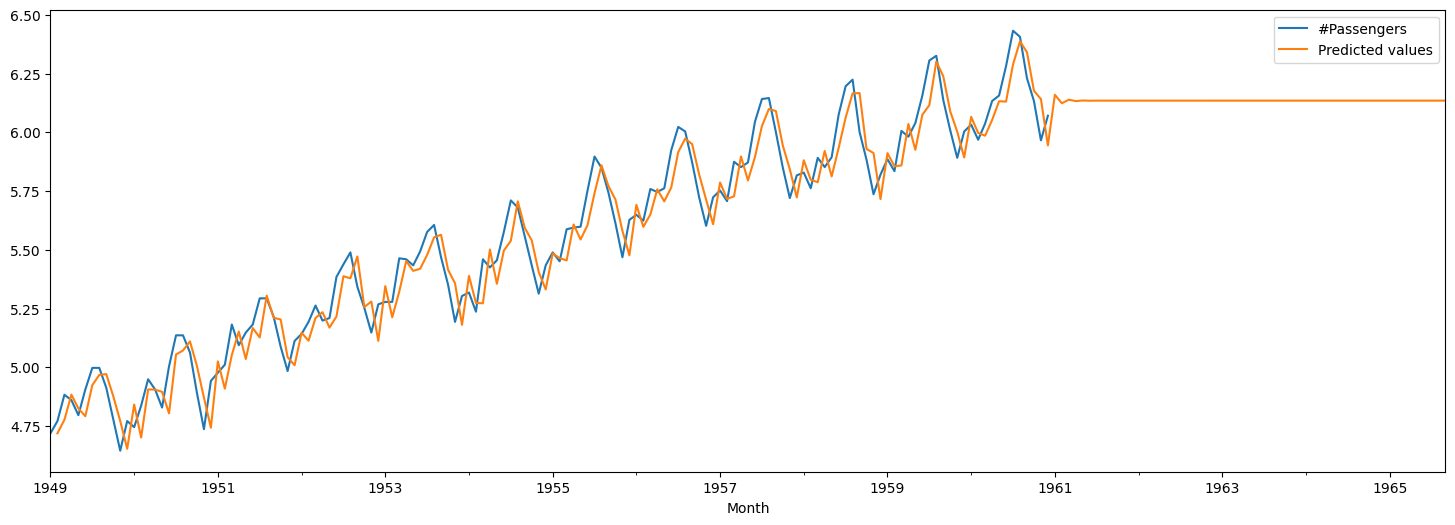

In [20]:
predictions = results.predict(1, 200,
                             typ = 'linear')
df_log.plot(legend = True)
predictions.plot(figsize = (18, 6), legend = True, label = "Predicted values")